# References
## Hamm et al. 1987a, b
* Distribution and measurement of single-axon recurrent inhibitory post-synaptic potentials. Results here are used mostly for comparisons in a qualitatively manner.
* Simulations tried to reproduce Figure 5 (first paper) and Figure 2 (second paper).
* The authors could obtain a proportion of motoneuron-motor axon that could be used to define the connectivity in the pool.
* Intracellular potentials were recorded from medial gastrocnemius motoneurons.

## Uchiyama et al. (2003a)
* Synaptic swellings are indications of the strength of an $\alpha$ motoneuron's synaptic inputs to other spinal neurons. The proportions used are those reported by Cullheim and Kellerth (1978), in which FF number is ca. 1.8 the FR number and ca. 2.2 the S number.

# Parameters adjusted
* Supposedly, the probability of connections and motoneuron conductances on Renshaw cells are the only parameters to be adjusted.

# Considerations
* Stimulation of motor axons would require modifications on the code and would be a time consuming task. In order to simulate the experiments presented, stimulation were delivered to the soma of the motoneuron and this was considered to have the same effect as a single motor axon stimulation.
* Proportions cited in the work of Hamm and colleages is not explored in the simulations yet because of the lack of informations regarding distances.
* Note that the results from this simulation can change considerably according to the type of the motoneuron stimulated, i.e. size.

In [1]:
import sys
sys.path.append('Parametrizations/Population')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.interpolate import UnivariateSpline

from simulator import simulator

In [27]:
nS = 75
nFR = 75
nFF = 150
nRC = 600
nMN = nS+nFR+nFF
# MNi = 230
MNi = (nMN)/2
# MNi = 80
params = 'final'

MNRCdecay = 1/6.0
RCMNdecay = 3.5/3
MNposition = 7
RCposition = 7

gmaxFF = 0.04

MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, MNi, params, MNRCdecay, RCMNdecay, MNposition, RCposition, gmaxFF)

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 75329 synapses were built
RC_ext
Synaptic Noise on RC_ext built
MG
MUnumber_MG-S
MUnumber_MG-FR
Synaptic Noise on MG built
All the 600 synaptic noises were built


<IPython.core.display.Javascript object>


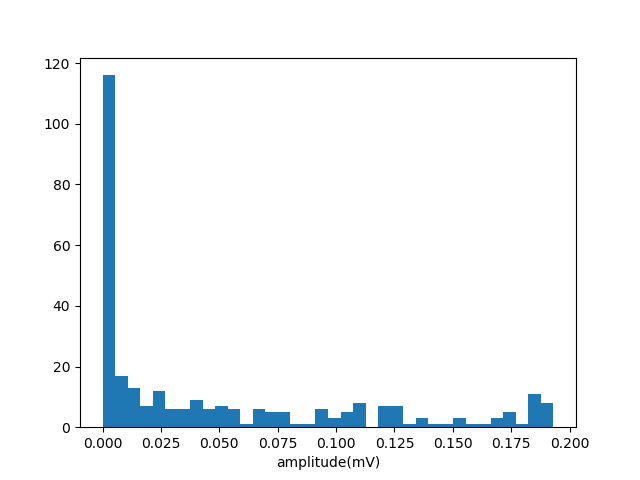

In [28]:
peaks = [abs(min(MNsignal[y,])) for y in range(MNsignal.shape[0]) if y != MNi]
bins = np.linspace(min(peaks),max(peaks),len(peaks)/8)
plt.figure()
plt.hist(peaks, bins=bins)
plt.xlabel('amplitude(mV)')
plt.show()

<IPython.core.display.Javascript object>


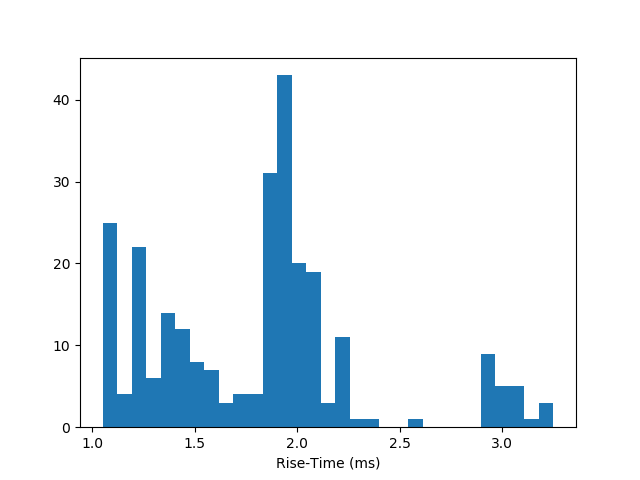

In [29]:
peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
rise_time = []

for i in range(MNsignal.shape[0]):
    if i==MNi:
        continue
    for j in range(MNsignal.shape[1]):
        if MNsignal[i,j]!=0.0:
            ti = j
            tf = np.where(MNsignal[i,]==peaks[i])[0][0]
            rise_time.append(t[tf]-t[ti])
            break
            
bins = np.linspace(min(rise_time),max(rise_time),len(rise_time)/8)
plt.figure()
plt.hist(rise_time, bins=bins)
plt.xlabel('Rise-Time (ms)')
plt.show()

<IPython.core.display.Javascript object>


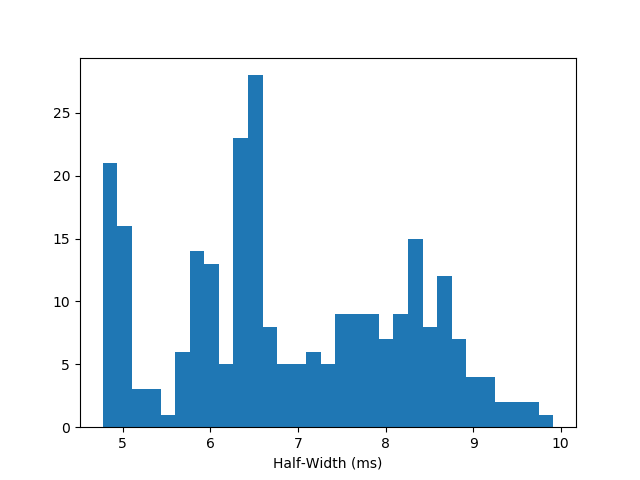

In [30]:
half_width = []

for i in range(MNsignal.shape[0]):
    if i == MNi:
        continue
    if min(MNsignal[i,]) == 0:
        continue
    spline = UnivariateSpline(t, MNsignal[i,] - min(MNsignal[i,])/2, s=0)
    roots = spline.roots()
    if len(roots)>2:
        continue
    r1, r2 = roots
    half_width.append(r2-r1)
    
bins = np.linspace(min(half_width),max(half_width),len(half_width)/8)
plt.figure()
plt.hist(half_width, bins=bins)
plt.xlabel('Half-Width (ms)')
plt.show()

<IPython.core.display.Javascript object>


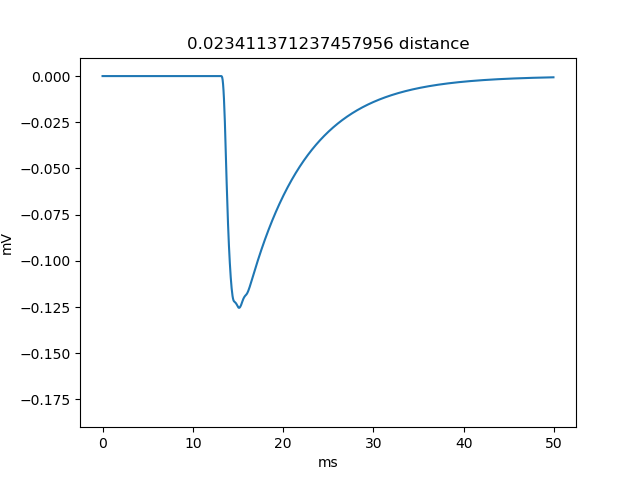

<IPython.core.display.Javascript object>


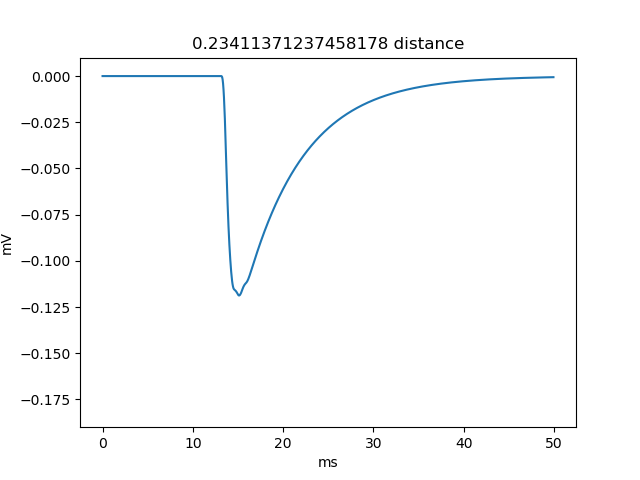

<IPython.core.display.Javascript object>


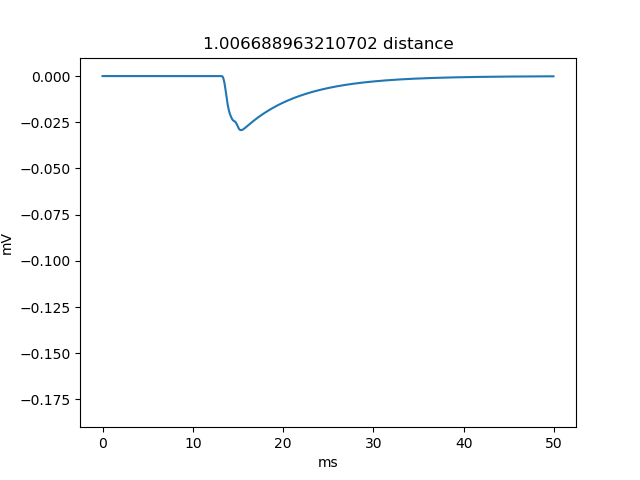

<IPython.core.display.Javascript object>


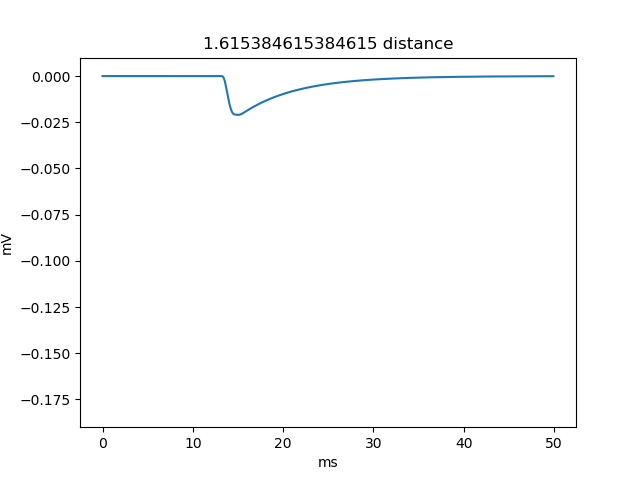

In [31]:
# According to 300 MNs divided along a 7 mm column
selectedMNs = [MNi+1, MNi+10, MNi+43, MNi+69]
y = min(MNsignal[MNi+1,])

for i in selectedMNs:
    plt.figure()
    plt.ylim(ymin=-0.19)#y)
    plt.ylim(ymax=0.01)
    plt.plot(t, MNsignal[i,])
    plt.title(str(positions[i] - positions[MNi])+' distance')
    plt.xlabel('ms')
    plt.ylabel('mV')
    plt.show()